# Problem 3
## 3.a and b

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial


def poisson(k,r):
    return np.exp(-r)*r**k/factorial(k)

def Simulate_Poisson(T,r,Nsamples, tau):
    #T = 1000
    #r = 10
    #Nsamples = 10000000
    #tau = .1 #window in seconds
    threshold = r/Nsamples*T
    print("Threshold: " + str(threshold))
    samples = np.random.rand(Nsamples)
    events = np.where(samples<threshold, 1,0)

    print("avg: "+str( sum(events)/T   ))



    points_per_window = int(np.ceil(Nsamples/T*tau))
    Nwindows = int(np.ceil(T/tau))
    #shapes array into rows of 10
    counts = np.sum(events.reshape(Nwindows,-1),axis=1)

    #print(counts)
    bin_values, bins, c  = plt.hist(counts,bins=(np.amax(counts)+1), range=(-.5,np.amax(counts)+.5))
    plt.xlabel("Counts per window")
    #plt.show()
    bin_mid = 0.5*(bins[1:] + bins[:-1])

    #print(bin_values[0][1]/bin_values[0][0]) #estimate lambda, r/tau, bin(1)/bin(0)
    print("lambda, in counts/s, estimated by bin[1]/bin[0]: " + str( bin_values[1]/bin_values[0]/tau))


    #multiply by tau to go from counts/window to counts/s
    print("mean (counts/s) : " + str(np.average(counts)/tau))
    print("var (counts/s) : " + str(np.var(counts)/tau))
    
    #Fit to Poisson distribution
    parameters, cov = curve_fit(poisson, bin_mid, bin_values/np.sum(bin_values))
    xval = np.linspace(0,np.amax(counts)+1)
    plt.plot(xval, (sum(bin_values)*poisson(xval,*parameters)),'r-', lw=2)
    plt.show()

Simulate_Poisson(T=1000,r=10,Nsamples=10000000,tau=.1)

Threshold: 0.001
avg: 10.018
lambda, in counts/s, estimated by bin[1]/bin[0]: 10.1206471072
mean (counts/s) : 10.018
var (counts/s) : 9.8059676


__The mean and variance match r within 3%, although the mean tends to be more accurate.  While the whole probability distribution can't be filled, $P_\tau(n)$ for $n<=6$ is represented, which accounts for 99.99% of the distribution.__

Threshold: 0.001
avg: 9.963
lambda, in counts/s, estimated by bin[1]/bin[0]: nan
mean (counts/s) : 9.963
var (counts/s) : 9.303631


/usr/local/lib/swan/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in double_scalars


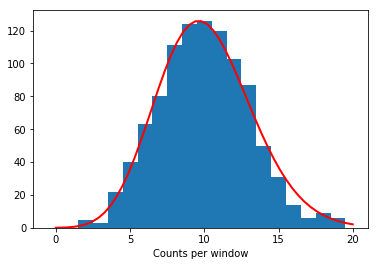

In [93]:
Simulate_Poisson(T=1000,r=10,Nsamples=10000000,tau=1)

Threshold: 0.001
avg: 9.817


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


lambda, in counts/s, estimated by bin[1]/bin[0]: nan
mean (counts/s) : 9.817
var (counts/s) : 10.52211


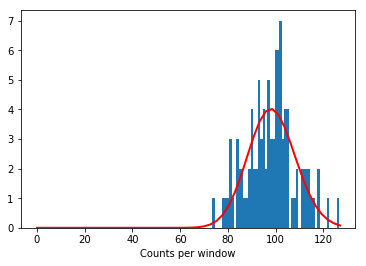

In [3]:
Simulate_Poisson(T=1000,r=10,Nsamples=10000000,tau=10)

__Changing $\tau$ effectively scales $r$, as $r$ is measured in counts per time interval.  Accounting for this gives matching mean and variance.__

Threshold: 0.01
avg: 99.944
lambda, in counts/s, estimated by bin[1]/bin[0]: nan
mean (counts/s) : 99.944
var (counts/s) : 97.264864


/usr/local/lib/swan/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in double_scalars


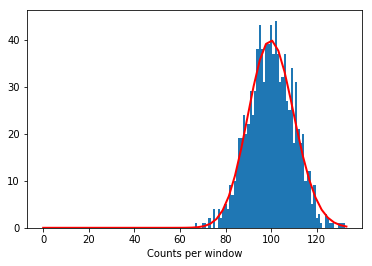

In [95]:
Simulate_Poisson(T=1000,r=100,Nsamples=10000000,tau=1)

__A higher rate weakens the assumption that $k/n << 1$, so the computed mean and variance are less accurate__

## 3.b Exponential Decay
__For a Poisson process, $P(k=0) = e^{(-r)}$, where $r$ is the average expected number of counts in a given interval of time. The probability for no events to occur in a given period of time is therefore $P(t)~e^{-rt}$, where $t$ is measured in the number of time intervals that define $r$.  Normalizing $P$ gives $P(t)=\frac{e^{-rt}}{r}$.__

Using Simulate_Poisson(T=1000,r=10,Nsamples=10000000,tau=.1):

For P=1/A*e^(-Bt): A=0.9631427937875683, B=0.995607391550871
Dividing A and B by tau gives: A=9.631427937875682, B=9.956073915508709


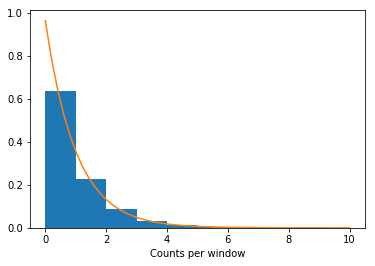

In [107]:
splits = np.split(events,np.where(events==1)[0])
deltaT = [len(x)/T for x in splits]
exp_values, exp_bins, c = plt.hist(deltaT,bins=10,range=(0,10),density=True,log=False)

#do fit

coefs = np.polyfit(np.arange(0,5)-0.5,np.log(exp_values[0:5]),1)
x = np.linspace(0,10)
print("For P=1/A*e^(-Bt): A=" + str(-1*coefs[1])+ ", B=" + str(-1*coefs[0]))
print("Dividing A and B by tau gives: A=" + str(-1*coefs[1]/tau)+ ", B=" + str(-1*coefs[0]/tau))

plt.plot(x, -1*coefs[1]*np.exp((x-0)*coefs[0]))
plt.xlabel("Counts per window")
plt.show()
#Dividing coefs[0] by tau gives r


__And A=B=r when put into the same units, within 5%.__

## 3c
__Since the events generated to check against the threshold are independent, the order chosen has no effect on the distribution.  In part A, we took the events to be generated "in order", where the first window was comprised of the first 10 events, the second the next 10, and so on.  But we just as easily could have assigned the events such that the first one went to the first window, the second the second window, and so on, giving the ith event to the "i mod Nwindows" Nwindow.  The interchangeability of the events suggests connections to the interchangeable particles in ideal gases.__